# Regression dengan KNN
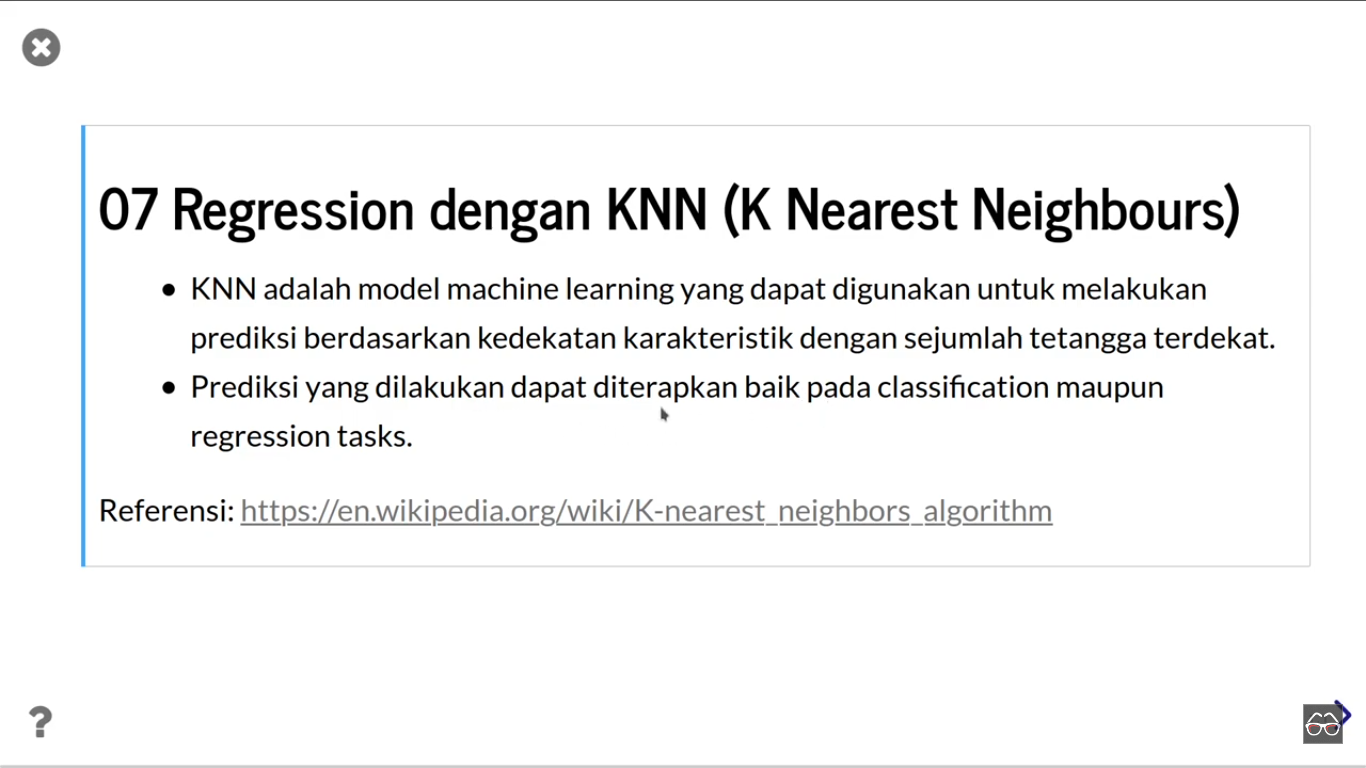

# Sample Dataset

In [9]:
import pandas as pd
sensus_df = pd.read_csv('sensus.csv')
print(sensus_df)

   tinggi      jk  berat
0     158    pria     64
1     170    pria     86
2     183    pria     84
3     191    pria     80
4     155  wanita     49
5     163  wanita     59
6     180  wanita     67
7     158  wanita     54
8     178  wanita     67


# Features dan Target

In [11]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


# Preprocess Dataset: Konversi Label menjadi Numerik Biner

In [14]:
X_train_transpossed = X_train.transpose()

print(f'X_train:\n{X_train}\n')
print(f'X_train_transpossed:\n{X_train_transpossed}\n')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']]

X_train_transpossed:
[[158 170 183 191 155 163 180 158 178]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]



In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk_binarized = lb.fit_transform(X_train_transpossed[1])

print(f'jk: {X_train_transpossed[1]}\n')
print(f'jk_binarized:\n{jk_binarized}')

jk: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']

jk_binarized:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [17]:
jk_binarized = jk_binarized.flatten()
jk_binarized

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [18]:
X_train_transpossed[1] = jk_binarized
X_train = X_train_transpossed.transpose()

print(f'X_train_transpossed:\n{X_train_transpossed}\n')
print(f'X_train:\n{X_train}\n')

X_train_transpossed:
[[158 170 183 191 155 163 180 158 178]
 [0 0 0 0 1 1 1 1 1]]

X_train:
[[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [178 1]]



# Training KKN Regression Model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Prediksi Berat Badan

In [25]:
X_new = np.array([[170, 0]])
X_new

array([[170,   0]])

In [27]:
y_pred = model.predict(X_new)
y_pred

array([70.66666667])

# Evaluasi KNN Regression Model

In [30]:
X_test = np.array([[161, 1], [180, 0], [175, 1], [165, 0]])
y_test = np.array([65, 96, 79, 75])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[161   1]
 [180   0]
 [175   1]
 [165   0]]

y_test: [65 96 79 75]


In [31]:
y_pred = model.predict(X_test)
y_pred

array([59.        , 72.66666667, 73.33333333, 69.66666667])

# Coefficient of Determination atau R²

In [32]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: -0.28007988017972996


# Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD)
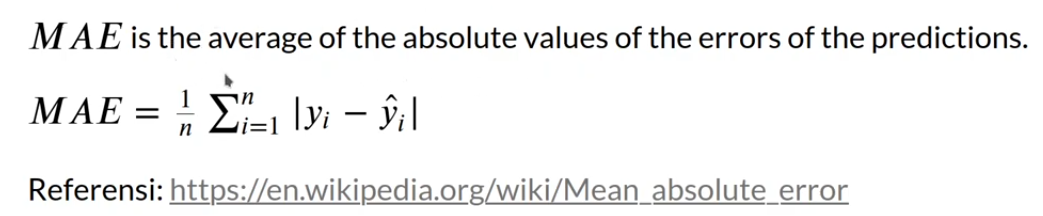

In [33]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 10.083333333333332


# Mean Squared Error (MSE) atau Mean Squared Deviation (MSD)
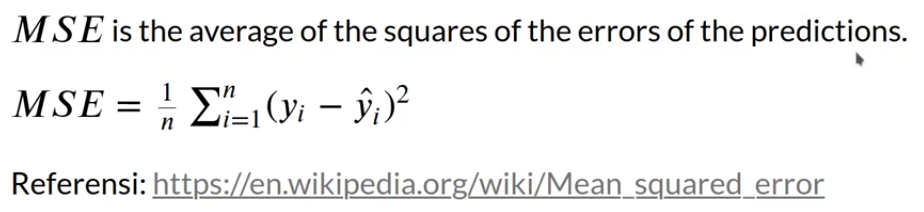

from sklearn.